<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Trabajo Fin de Master</header1></center>
<left><h1>5. Desarrollo específico de la contribución</header1></left>

**Presentado por:  Andres Mauricio Triana Sanchez** <br>
**Fecha: 20/06/2025**

## Importación de librerias necesarias

In [ ]:
# Para el desarrollo de esta comparativa se importaron las siguientes librerías:
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.preprocessing import StandardScaler
import category_encoders as cencoders
import seaborn as sns
import numpy as np
import hvplot.pandas
import os
import warnings
warnings.filterwarnings('ignore')

## Cargar el Dataset

In [ ]:
# Código para cargar el Dataset # Mantener formato original
# Source Data filtered by year 2024 + Confidencialidad
url = 'PreTremplate01.csv'
dataset = pd.read_csv(url, keep_default_na=False)

In [ ]:
# Visualizamos los datos que cargamos
dataset

,tenant_id,Tenant Name,Vendor Name,Invoice Date,Freight,Freight 2,Tariff,Sales Tax,Invoice Total,Invoice Net,Document Type,Terms_Normalizado,Day Of Year,Week Of Year,Month
0,59,Creative Office Resources,UPRIGHT INSTALLATION SERVICES,1/2/2024,0.0,0.0,0.0,0.00,1200.00,1200.00,Bill,Net 10 Days,2,1,1
1,59,Creative Office Resources,UPRIGHT INSTALLATION SERVICES,1/2/2024,0.0,0.0,0.0,0.00,1200.00,1200.00,Bill,Net 10 Days,2,1,1
2,59,Creative Office Resources,UPRIGHT INSTALLATION SERVICES,1/2/2024,0.0,0.0,0.0,0.00,29500.00,29500.00,Bill,Net 10 Days,2,1,1
3,57,Op Houston,"Lol, Inc.",1/1/2024,0.0,0.0,0.0,90.75,1220.75,1130.00,Operating Bill,Net 0 Days,1,1,1
4,13,Spencer And Co,DTANK,1/2/2024,0.0,0.0,0.0,0.00,101766.73,101766.73,Proforma,Net 5 Days,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413179,82,King Business Interiors,Exemplis LLC,12/31/2024,0.0,0.0,0.0,0.00,579.84,579.84,Bill,Net 30 Days,366,1,12
413180,34,Working Spaces,Nucraft Furniture,12/30/2024,0.0,0.0,0.0,0.00,0.00,0.00,Bill,Net 30 Days,365,1,12
413181,15,Dancker,Nucraft Furniture,12/31/2024,0.0,0.0,0.0,0.00,9212.40,9212.40,Bill,Net 30 Days,366,1,12
413182,14,Goengineer,Dassault Systemes Americas Corp,12/31/2024,0.0,0.0,0.0,0.00,26436.46,26436.46,Bill,Net 30 Days,366,1,12


In [ ]:
# Informacion estructura de datos
dataset.dtypes

tenant_id              int64
Tenant Name           object
Vendor Name           object
Invoice Date          object
Freight              float64
Freight 2            float64
Tariff               float64
Sales Tax            float64
Invoice Total        float64
Invoice Net          float64
Document Type         object
Terms_Normalizado     object
Day Of Year            int64
Week Of Year           int64
Month                  int64
dtype: object

## Explique el problema de clasificación a resolver. 

**Descripción del problema:** Desarrollar una herramienta de analítica de datos con base en algoritmos de Machine Learning que permita la predicción del flujo de efectivo en la industria de interiores comerciales

**Variable objetivo (salida):**
> **CashFlow**. Flujo del Efectivo.

**Variables de entrada:** Son cinco(5)
> **tenant-id**. Id Intermediario.

> **vendor-id**. Id Vendedor.

> **Invoice Net**. Facturacion Neta.

> **documentType-id**. Id Tipo de Documento.

> **Month**. Mes del año. Valores: desde 01 hasta 12.

## Caracterización del Dataset

**Transformación del conjunto de datos:** 
>- Filtrar las columnas necesarias para el análisis de los datos.
>- Convertir los valores no numericos (NaN) a valores numéricos
>- Eliminar filas con valores negativos o ceros en ['Invoice Net']

In [ ]:
# Convertir los valores no numericos (NaN) a valores numéricos
columnas_numericas = ["Invoice Total", "Freight", "Freight 2", "Tariff", "Sales Tax", "Invoice Net"]
for col in columnas_numericas:
    dataset[col] = dataset[col].fillna(0)

In [ ]:
# Eliminar filas con 'Invoice Net' <= 0
dataset.drop(dataset[dataset['Invoice Net']<1].index, inplace=True)

In [ ]:
# Guardar dataset transformado en un archivo CSV
dataset.to_csv("PreTremplate01_Transform.csv", index=False)

In [ ]:
# Visualizamos los datos de las nuevas columnas
dataset

,tenant_id,Tenant Name,Vendor Name,Invoice Date,Freight,Freight 2,Tariff,Sales Tax,Invoice Total,Invoice Net,Document Type,Terms_Normalizado,Day Of Year,Week Of Year,Month
0,59,Creative Office Resources,UPRIGHT INSTALLATION SERVICES,1/2/2024,0.0,0.0,0.0,0.00,1200.00,1200.00,Bill,Net 10 Days,2,1,1
1,59,Creative Office Resources,UPRIGHT INSTALLATION SERVICES,1/2/2024,0.0,0.0,0.0,0.00,1200.00,1200.00,Bill,Net 10 Days,2,1,1
2,59,Creative Office Resources,UPRIGHT INSTALLATION SERVICES,1/2/2024,0.0,0.0,0.0,0.00,29500.00,29500.00,Bill,Net 10 Days,2,1,1
3,57,Op Houston,"Lol, Inc.",1/1/2024,0.0,0.0,0.0,90.75,1220.75,1130.00,Operating Bill,Net 0 Days,1,1,1
4,13,Spencer And Co,DTANK,1/2/2024,0.0,0.0,0.0,0.00,101766.73,101766.73,Proforma,Net 5 Days,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413178,44,Henriksen Butler,Exemplis LLC,12/31/2024,0.0,0.0,0.0,0.00,483.20,483.20,Bill,Net 30 Days,366,1,12
413179,82,King Business Interiors,Exemplis LLC,12/31/2024,0.0,0.0,0.0,0.00,579.84,579.84,Bill,Net 30 Days,366,1,12
413181,15,Dancker,Nucraft Furniture,12/31/2024,0.0,0.0,0.0,0.00,9212.40,9212.40,Bill,Net 30 Days,366,1,12
413182,14,Goengineer,Dassault Systemes Americas Corp,12/31/2024,0.0,0.0,0.0,0.00,26436.46,26436.46,Bill,Net 30 Days,366,1,12


**Segunda transformación del conjunto de datos:** 
>- Convertir la variable categorica ['Vendor Name'] en variable  numerica.
>- Eliminar columnas no requeridas en la clasificacion ['Week Of Year', 'Day Of Year', 'Tenant Name', 'Invoice Date', 'Freight', 'Freight 2', 'Tariff', 'Sales Tax', 'Invoice Total']
>- Renombrar columna 'VendorName' como 'vendor-id', 'Terms_Normalizado' como 'CashFlow'}
>- Guardar las variables categorias para determinar su codificacion

In [ ]:
# Guardar las variables categorias para determinar su codificacion
dftmp=dataset[['Vendor Name']]

In [ ]:
# Convertir variables categoricas en numericas
encoder = cencoders.OrdinalEncoder(cols=['Vendor Name'])
data = encoder.fit_transform(dataset)

In [ ]:
# Eliminar columnas no requeridas en la clasificación
data.drop(columns=['Week Of Year', 'Day Of Year', 'Tenant Name', 'Invoice Date', 'Freight', 'Freight 2', 'Tariff', 'Sales Tax', 'Invoice Total'], inplace=True)

In [ ]:
# Renombrar Columnas
data.rename(columns={'Vendor Name': 'vendor-id', 'Terms_Normalizado': 'CashFlow'}, inplace=True)

In [ ]:
# Guardar las variables categorias para determinar su codificacion en un archivo CSV
dftmp['vendor-id'] = data['vendor-id']
dftmp.to_csv("VariablesCategoricasEncoder.csv", index=False)

In [ ]:
# Ordenamos las columnas
data=data.loc[:, ['Month', 'tenant_id', 'vendor-id', 'Invoice Net', 'Document Type', 'CashFlow']]

**Se analizan las primeras 10 filas del conjunto de datos.**

In [ ]:
# Visualizamos la transformación
data.head(10)

,Month,tenant_id,vendor-id,Invoice Net,Document Type,CashFlow
0,1,59,1,1200.00,Bill,Net 10 Days
1,1,59,1,1200.00,Bill,Net 10 Days
2,1,59,1,29500.00,Bill,Net 10 Days
3,1,57,2,1130.00,Operating Bill,Net 0 Days
4,1,13,3,101766.73,Proforma,Net 5 Days
5,1,11,4,8312.00,Operating Bill,Net 0 Days
6,1,57,5,16657.00,Operating Bill,Net 0 Days
7,1,32,6,617.50,Operating Bill,Net 0 Days
8,1,32,6,1592.50,Operating Bill,Net 0 Days
9,1,59,7,635.84,Operating Bill,Net 0 Days


**Se analizan las ultimas 10 filas del conjunto de datos**

In [ ]:
data.tail(10)

,Month,tenant_id,vendor-id,Invoice Net,Document Type,CashFlow
413173,12,14,575,1493.30,Bill,Net 0 Days
413174,12,14,575,1794.00,Bill,Net 0 Days
413175,12,14,575,2225.78,Bill,Net 0 Days
413176,12,14,575,95281.46,Bill,Net 0 Days
413177,12,14,575,17669.01,Bill,Net 30 Days
413178,12,44,77,483.20,Bill,Net 30 Days
413179,12,82,77,579.84,Bill,Net 30 Days
413181,12,15,181,9212.40,Bill,Net 30 Days
413182,12,14,575,26436.46,Bill,Net 30 Days
413183,12,14,575,1794.00,Bill,Net 30 Days


In [ ]:
# Guardar dataset transformado en un archivo CSV
data.to_csv("PreTremplate01_Transform_2.csv", index=False)

**Consultamos la información que nos proporciona el conjunto de datos para el algoritmo de clasificación.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395455 entries, 0 to 413183
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Month          395455 non-null  int64  
 1   tenant_id      395455 non-null  int64  
 2   vendor-id      395455 non-null  int32  
 3   Invoice Net    395455 non-null  float64
 4   Document Type  395455 non-null  object 
 5   CashFlow       395455 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(2)
memory usage: 19.6+ MB


**Dimensionalidad del conjunto de datos (filas, columnas)**

In [ ]:
# Retorna la dimensionalidad del conjunto de datos
data.shape

(395455, 6)

**Distribución por clases de la variable objetivo CashFlow (Terms_Normalizado) y el número de instancias por clase:**

In [ ]:
print(data.groupby('CashFlow').size())

CashFlow
Net 0 Days        65892
Net 10 Days       26006
Net 120 Days       2107
Net 180 Days       1825
Net 20 Days        3398
Net 30 Days      255905
Net 360 Days       2516
Net 45 Days        7553
Net 5 Days         2323
Net 60 Days       20507
Net 90 Days        2161
Net >360 Days      5262
dtype: int64


**Se grafica la variable CashFlow respecto a su relación con los meses del año**

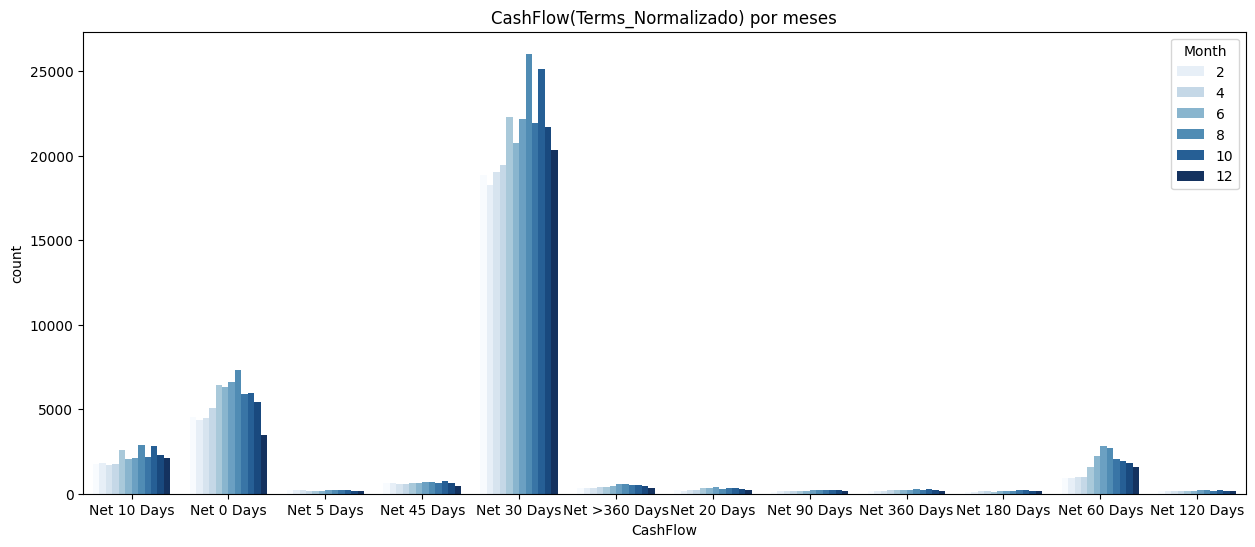

In [ ]:
plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
sns.countplot(x ='CashFlow', hue = "Month", data = data, palette='Blues')
plt.title("CashFlow(Terms_Normalizado) por meses")
plt.show()

**Se grafica la variable CashFlow respecto a su relación con Document Type**

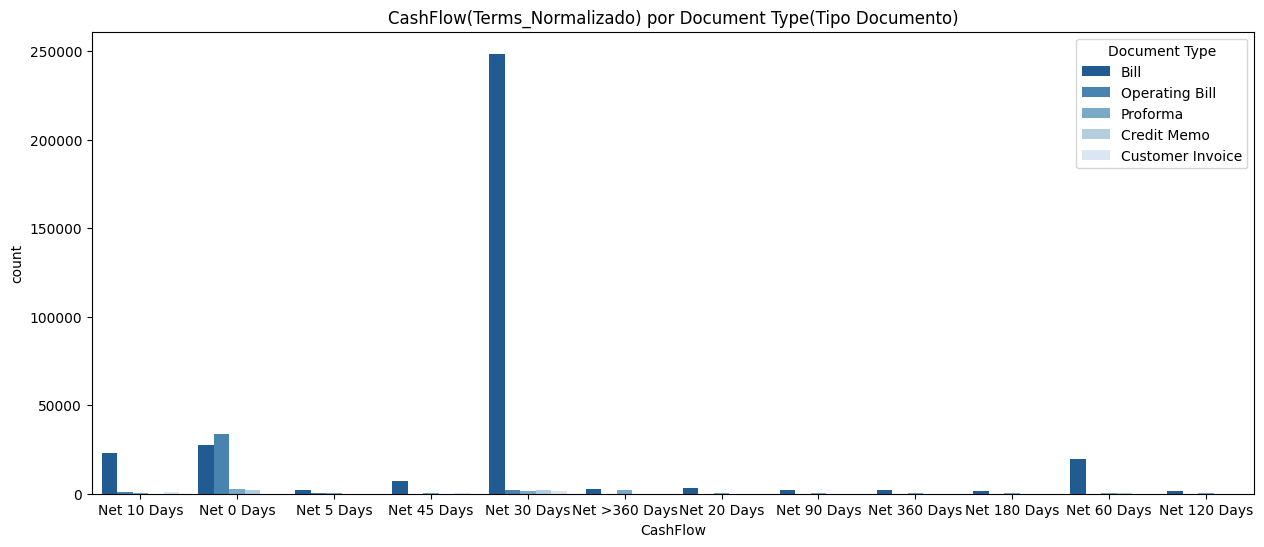

In [ ]:
plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
sns.countplot(x ='CashFlow', hue = "Document Type", data = data, palette='Blues_r')
plt.title("CashFlow(Terms_Normalizado) por Document Type(Tipo Documento)")
plt.show()

**Se grafica la variable CashFlow respecto a su relación con Invoice Net**

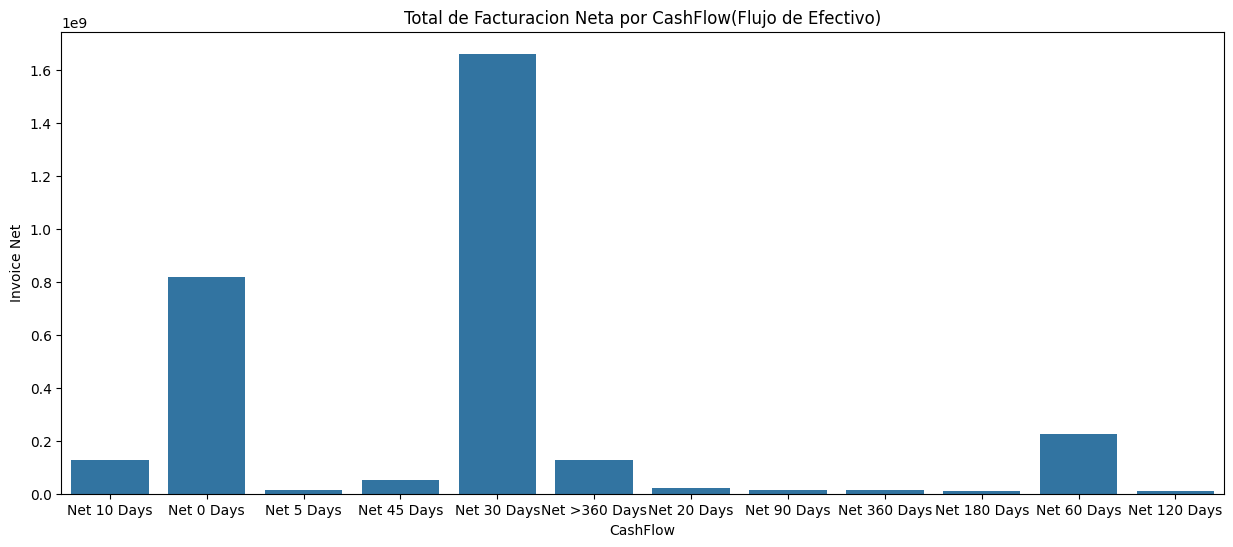

In [ ]:
plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
sns.barplot(data, x="CashFlow", y="Invoice Net", estimator="sum", errorbar=None)
plt.title("Total de Facturacion Neta por CashFlow(Flujo de Efectivo)")
plt.show()

**Se grafica la variable Invoice Net respecto a su relación con los meses del año**

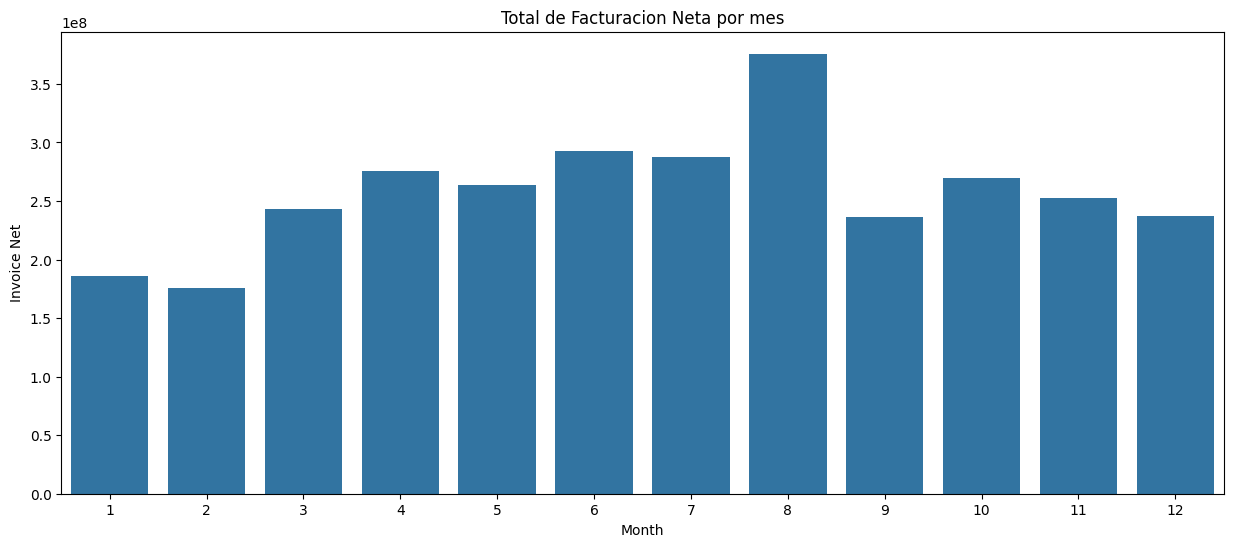

In [ ]:
plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
sns.barplot(data, x="Month", y="Invoice Net", estimator="sum", errorbar=None)
plt.title("Total de Facturacion Neta por mes")
plt.show()

**Se grafica la variable Invoice Net respecto a su relación Document Type(Tipo Documento)**

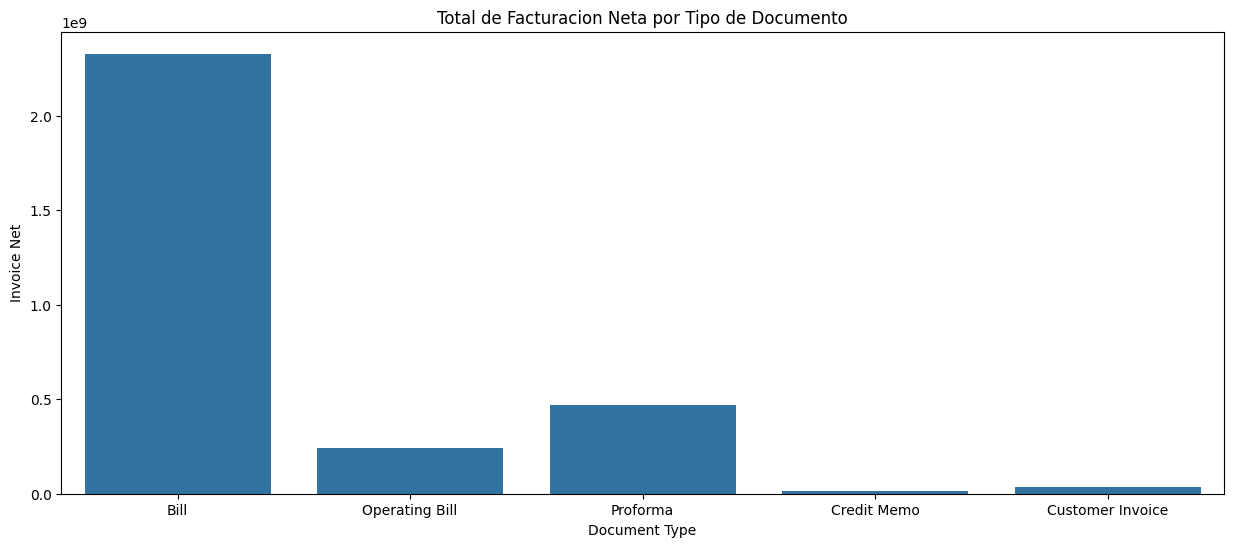

In [ ]:
plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
sns.barplot(data, x="Document Type", y="Invoice Net", estimator="sum", errorbar=None)
plt.title("Total de Facturacion Neta por Tipo de Documento")
plt.show()

**Diagrama de cajas y bigotes para la variable 'CashFlow'**

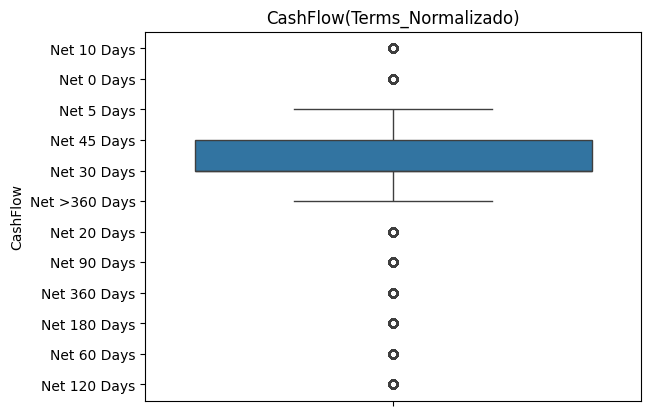

In [ ]:
sns.boxplot(y = 'CashFlow', data =data)
plt.title("CashFlow(Terms_Normalizado)")
pyplot.show()

**Gráfico multivariable con la matriz de dispersión para el conjunto de datos del algoritmo de clasificación**

>- Convertir las variables categoricas ['Document Type', 'CashFlow'] en variables numericas para generar el gráfico.

In [ ]:
encoder = cencoders.OrdinalEncoder(cols=['Document Type', 'CashFlow'])
dftmp = encoder.fit_transform(data)

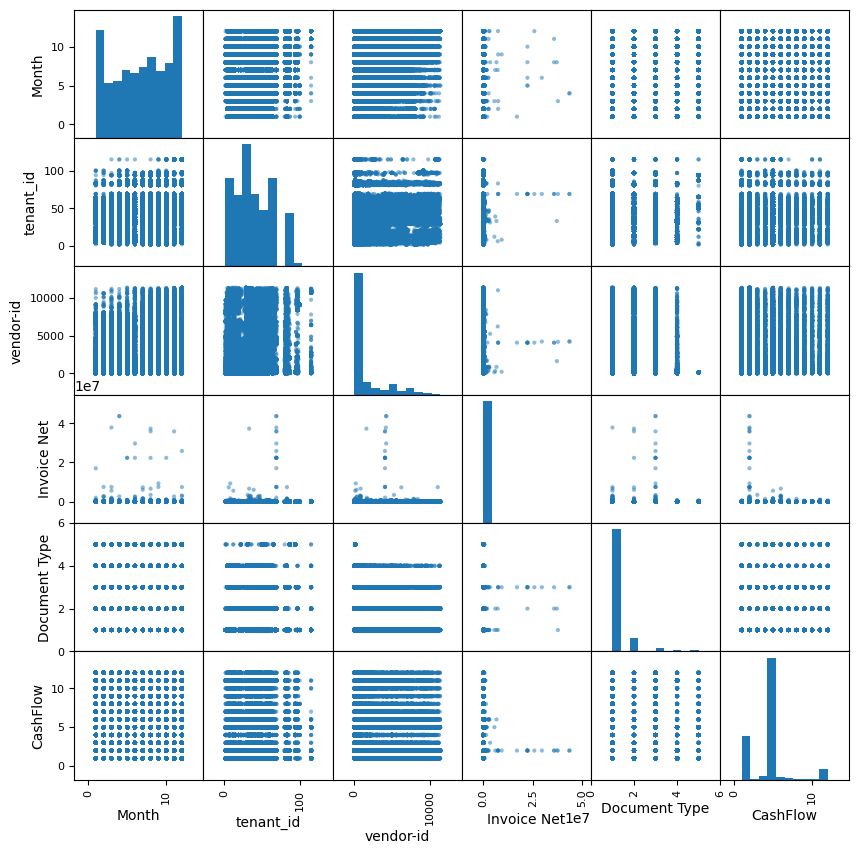

In [ ]:
scatter_matrix(dftmp, range_padding=0.50, figsize=(10.0,10.0))
pyplot.show()

**Se grafica la Matriz de Correlación (Relación entre los atributos) para el conjunto de datos del algortimo de clasificación**

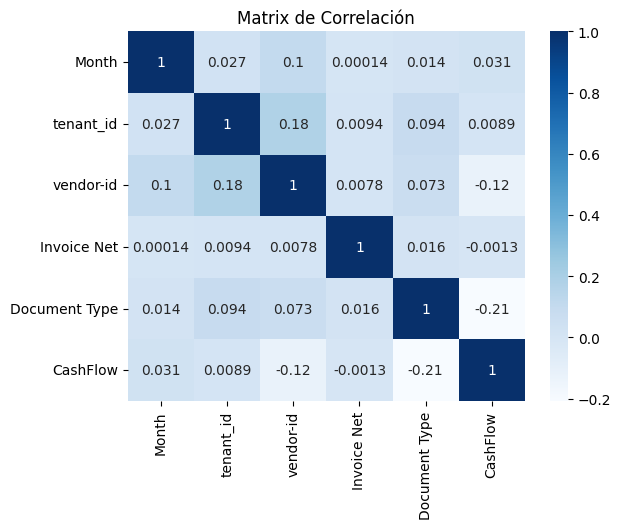

In [ ]:
sns.heatmap(data=dftmp.corr(), cmap="Blues", annot=True)
plt.title("Matrix de Correlación")
plt.show()

**Se ordenan descendentemente la correllación para CashFlow**

In [ ]:
tmp=dftmp.corr()
tmp['CashFlow'].sort_values(ascending=False)

CashFlow         1.000000
Month            0.030624
tenant_id        0.008945
Invoice Net     -0.001270
vendor-id       -0.121217
Document Type   -0.207580
Name: CashFlow, dtype: float64

**Resumen estadístico de los datos:**

In [ ]:
data['Document Type'].describe()

count     395455
unique         5
top         Bill
freq      341284
Name: Document Type, dtype: object

In [ ]:
data['CashFlow'].describe()

count          395455
unique             12
top       Net 30 Days
freq           255905
Name: CashFlow, dtype: object

## Evaluación Modelos de Predicción

>- La evaluación de los modelos de predicción se llevara a cabo con la libreria PyCaret. "Pycaret es una biblioteca de aprendizaje automático de código abierto, en Python que automatiza los flujos de trabajo de aprendizaje automático". PYCARET. https://pycaret.org.
>- Verificamos la versión de la biblioteca

In [ ]:
# Test version de la libreria
import pycaret
pycaret.__version__

'3.3.2'

**Modelos de Predicción**

>- **Configuración de los Modelos de Predicción**

In [ ]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'CashFlow', session_id = 123)

,Description,Value
0,Session id,123
1,Target,CashFlow
2,Target type,Multiclass
3,Target mapping,"Net 0 Days: 0, Net 10 Days: 1, Net 120 Days: 2, Net 180 Days: 3, Net 20 Days: 4, Net 30 Days: 5, Net 360 Days: 6, Net 45 Days: 7, Net 5 Days: 8, Net 60 Days: 9, Net 90 Days: 10, Net >360 Days: 11"
4,Original data shape,"(395455, 6)"
5,Transformed data shape,"(395455, 10)"
6,Transformed train set shape,"(276818, 10)"
7,Transformed test set shape,"(118637, 10)"
8,Numeric features,4
9,Categorical features,1


>- **Evaluación de los Modelos de Predicción**
>- **Se almacena los parametros del mejor modelo**

In [ ]:
# compare baseline models, best guarda el modelo + optimo
bestModel = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8691,0.9542,0.8691,0.8580,0.8622,0.7504,0.7521,10.8110
dt,Decision Tree Classifier,0.8684,0.8989,0.8684,0.8679,0.8680,0.7588,0.7588,0.5470
et,Extra Trees Classifier,0.8667,0.9401,0.8667,0.8586,0.8620,0.7494,0.7501,55.5590
xgboost,Extreme Gradient Boosting,0.8500,0.9554,0.8500,0.8361,0.8348,0.7016,0.7088,12.9270
lightgbm,Light Gradient Boosting Machine,0.8491,0.9535,0.8491,0.8351,0.8348,0.6986,0.7069,10.7040
catboost,CatBoost Classifier,0.8451,0.9503,0.8451,0.8333,0.8275,0.6879,0.6975,113.3130
gbc,Gradient Boosting Classifier,0.8204,0.0000,0.8204,0.8168,0.7980,0.6235,0.6440,97.4400
knn,K Neighbors Classifier,0.7386,0.8381,0.7386,0.7164,0.7234,0.4943,0.4963,0.9290
ada,Ada Boost Classifier,0.7360,0.0000,0.7360,0.6680,0.6658,0.3651,0.4339,3.9790
ridge,Ridge Classifier,0.7293,0.0000,0.7293,0.6022,0.6501,0.3460,0.4125,0.3940


Para interpretar los 5 mejores modelos, nos enfocaremos en sus métricas de rendimiento clave: `Accuracy`, `AUC`, `Recall`, `Precision`, `F1`, `Kappa` y `MCC`, así como el tiempo de entrenamiento (`TT`). Observando los valores resaltados en amarillo y los que están más cercanos al óptimo (1.0 para la mayoría, y un equilibrio para F1), podemos sacar las siguientes conclusiones:

Los 5 mejores modelos, en orden de mejor `Accuracy`, son:

1.  **Random Forest Classifier (rf)**
2.  **Decision Tree Classifier (dt)**
3.  **Extra Trees Classifier (et)**
4.  **Extreme Gradient Boosting (xgboost)**
5.  **Light Gradient Boosting Machine (lightgbm)**

Aquí está una interpretación detallada de cada uno:

---

### 1. Random Forest Classifier (rf)

* **Accuracy: 0.8691 (Mejor)**: Es el modelo con la mayor precisión general, lo que indica que clasifica correctamente la mayor proporción de instancias.
* **AUC: 0.9542 (Muy bueno)**: Un valor de AUC muy alto, cercano a 1, sugiere una excelente capacidad para distinguir entre las clases, lo que es un indicador robusto del rendimiento del modelo.
* **Recall: 0.8691 (Mejor)**: Al igual que la precisión, su Recall es el más alto, lo que significa que es muy bueno identificando todas las instancias positivas.
* **Precision: 0.8580**: Una precisión sólida, lo que indica que cuando predice una clase positiva, es muy probable que sea correcta.
* **F1: 0.8622**: Un F1 Score alto, reflejando un buen equilibrio entre `Precision` y `Recall`.
* **Kappa: 0.7504** y **MCC: 0.7521**: Valores elevados para `Kappa` y `MCC`, lo que sugiere un acuerdo substancial entre las predicciones del modelo y las etiquetas verdaderas, y un buen desempeño incluso en datasets potencialmente desequilibrados.
* **TT (Sec): [No visible en la imagen]**: El tiempo de entrenamiento no es visible, pero los Random Forests suelen tener un tiempo de entrenamiento moderado a alto, dependiendo de la cantidad de árboles.

**Interpretación General:** Random Forest es el modelo con el rendimiento más completo y consistente en todas las métricas de clasificación, lo que lo convierte en el **mejor modelo** según esta tabla. Es robusto y suele generalizar bien.

---

### 2. Decision Tree Classifier (dt)

* **Accuracy: 0.8684**: Muy cercano a Random Forest en precisión.
* **AUC: 0.8989**: Un buen valor de AUC, aunque notablemente inferior al de Random Forest y los modelos de boosting. Esto podría indicar una menor capacidad de discriminación en comparación con los ensembles.
* **Recall: 0.8684**: También muy alto, similar a su precisión.
* **Precision: 0.8879 (Mejor entre los 5)**: Destaca por tener la precisión más alta entre estos modelos, lo que significa que sus predicciones positivas son las más confiables.
* **F1: 0.8880 (Mejor entre los 5)**: Con el F1 Score más alto, indica un excelente equilibrio entre su alta `Precision` y su alto `Recall`.
* **Kappa: 0.7588 (Mejor)** y **MCC: 0.7588 (Mejor)**: Lidera en estas dos métricas, lo que sugiere que su acuerdo con las etiquetas verdaderas es superior y su rendimiento es muy bueno.
* **TT (Sec): [No visible en la imagen]**: Los árboles de decisión suelen ser muy rápidos de entrenar en comparación con los ensembles.

**Interpretación General:** El Decision Tree, a pesar de ser un modelo más simple que los ensembles, muestra un rendimiento excepcionalmente bueno en `Precision`, `F1`, `Kappa` y `MCC`. Su menor `AUC` en comparación con Random Forest y XGBoost/LightGBM podría ser un punto a considerar, pero sus otras métricas son impresionantes. Podría ser una excelente opción si la interpretabilidad del modelo es clave, ya que los árboles de decisión son más fáciles de entender.

---

### 3. Extra Trees Classifier (et)

* **Accuracy: 0.8667**: Muy similar a Random Forest y Decision Tree en precisión.
* **AUC: 0.9401**: Excelente `AUC`, indicando una gran capacidad discriminativa, aunque ligeramente inferior al de Random Forest y XGBoost.
* **Recall: 0.8667**: Alto y consistente con su precisión.
* **Precision: 0.8586**: Buena precisión.
* **F1: 0.8620**: F1 Score sólido, mostrando un buen balance.
* **Kappa: 0.7494** y **MCC: 0.7501**: Muy buenos valores, prácticamente idénticos a los de Random Forest.
* **TT (Sec): [No visible en la imagen]**: Similar a Random Forest, el tiempo de entrenamiento puede ser considerable.

**Interpretación General:** Extra Trees es un algoritmo muy similar a Random Forest en rendimiento, ofreciendo una alta precisión y excelentes métricas de discriminación y acuerdo. Suele ser un poco más rápido que Random Forest debido a su aleatoriedad en la selección de umbrales de división. Es una alternativa sólida al Random Forest.

---

### 4. Extreme Gradient Boosting (xgboost)

* **Accuracy: 0.8500**: Una precisión ligeramente inferior a los tres anteriores.
* **AUC: 0.9554 (El mejor)**: Destaca por tener el `AUC` más alto de todos los modelos, lo que indica una capacidad de discriminación superior para clasificar correctamente las clases.
* **Recall: 0.8500**: Consistentemente bueno.
* **Precision: 0.8361**: Ligeramente inferior a los modelos basados en bagging.
* **F1: 0.8348**: Un F1 Score bueno, pero un poco por debajo de los modelos de árboles individuales y Random Forest/Extra Trees.
* **Kappa: 0.7016** y **MCC: 0.7088**: Valores buenos, aunque los más bajos entre los 5 mejores, lo que sugiere un acuerdo ligeramente menor en comparación.
* **TT (Sec): [No visible en la imagen]**: XGBoost es conocido por ser muy eficiente y rápido, especialmente en grandes conjuntos de datos, aunque el tiempo de entrenamiento real dependerá del hardware y la optimización.

**Interpretación General:** XGBoost es un algoritmo de boosting muy potente y es notable por su excelente `AUC`, lo que lo hace muy bueno para problemas donde la discriminación entre clases es crucial. Aunque su Accuracy general, `Precision` y `F1` son ligeramente más bajos que los modelos basados en bagging (Random Forest, Extra Trees) y el Decision Tree en este caso particular, su robustez y escalabilidad lo hacen una opción muy popular.

---

### 5. Light Gradient Boosting Machine (lightgbm)

* **Accuracy: 0.8491**: Muy similar a XGBoost en precisión.
* **AUC: 0.9535**: Un `AUC` excelente, solo ligeramente inferior al de XGBoost y muy cercano al de Random Forest, reafirmando su gran capacidad discriminativa.
* **Recall: 0.8491**: Consistente con su precisión.
* **Precision: 0.8351**: Muy similar a XGBoost.
* **F1: 0.8338**: También muy similar a XGBoost.
* **Kappa: 0.6986** y **MCC: 0.7069**: Los valores más bajos entre los 5 mejores en `Kappa` y `MCC`, al igual que XGBoost.
* **TT (Sec): [No visible en la imagen]**: LightGBM es famoso por su **velocidad y eficiencia computacional**, superando a menudo a XGBoost en este aspecto, especialmente con grandes datasets.

**Interpretación General:** LightGBM ofrece un rendimiento muy competitivo, especialmente en términos de `AUC`, siendo un fuerte rival para XGBoost. Su principal ventaja sobre XGBoost es su velocidad de entrenamiento y menor consumo de memoria, lo que lo hace ideal para datasets muy grandes. Si el tiempo de entrenamiento es una preocupación crítica y se trabaja con volúmenes masivos de datos, LightGBM podría ser preferible incluso si sus métricas son marginalmente más bajas.

---

**Resumen y Recomendaciones:**

* **Si el rendimiento global y la robustez son la prioridad:** **Random Forest Classifier** parece ser el ganador claro en este caso, liderando en `Accuracy`, `Recall`, y con excelentes valores en todas las demás métricas.
* **Si la interpretabilidad y una alta Precisión en predicciones positivas son cruciales:** El **Decision Tree Classifier** es sorprendentemente competitivo, destacando en `Precision`, `F1`, `Kappa` y `MCC`. Sin embargo, hay que ser cauteloso con el sobreajuste que un solo árbol puede sufrir.
* **Si la capacidad de discriminación es lo más importante (ej., identificar correctamente positivos y negativos sin importar el umbral):** Tanto **XGBoost** como **LightGBM** muestran los mejores valores de `AUC`, lo que los hace ideales para escenarios donde la separación de clases es fundamental.
* **Si se trabaja con grandes volúmenes de datos y la velocidad de entrenamiento es un factor clave:** **LightGBM** probablemente ofrecerá la mejor combinación de rendimiento y eficiencia.

Es importante recordar que estas conclusiones se basan en el rendimiento en un dataset específico y para un conjunto de parámetros dados. La optimización de hiperparámetros (tuning) podría alterar ligeramente el ranking de los modelos.

In [ ]:
# El modelo de predicción en Redes Neurales se corre independiente por la alta demanda en recursos de computo
test_RedNeuralModel = compare_models(include = ['mlp'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
mlp,MLP Classifier,0.7327,0.7744,0.7327,0.6772,0.6643,0.3620,0.4237,21.4320


In [ ]:
# Despliega los parametros del mejor modelo de predicción
print(bestModel) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


>- **La funcion plot_model nos facilita el analisis del rendimiento del mejor modelo entrenado con el conjunto de prueba**

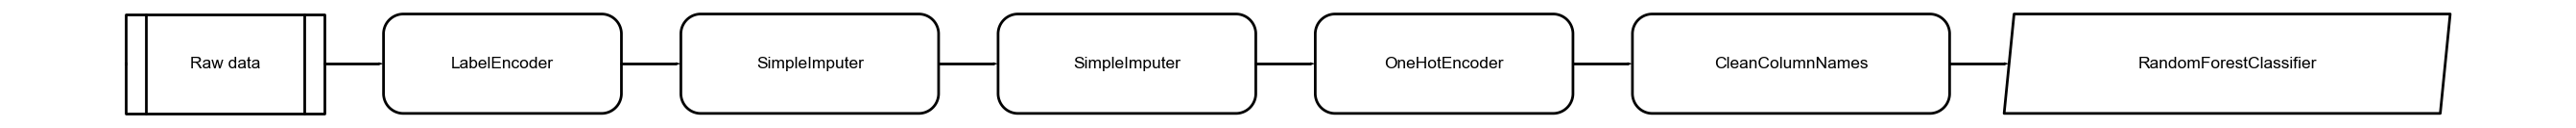

In [ ]:
# Analyze Model -> pipeline -> Dibujo esquemático de la tubería de preprocesamiento
plot_model(bestModel, plot = 'pipeline')

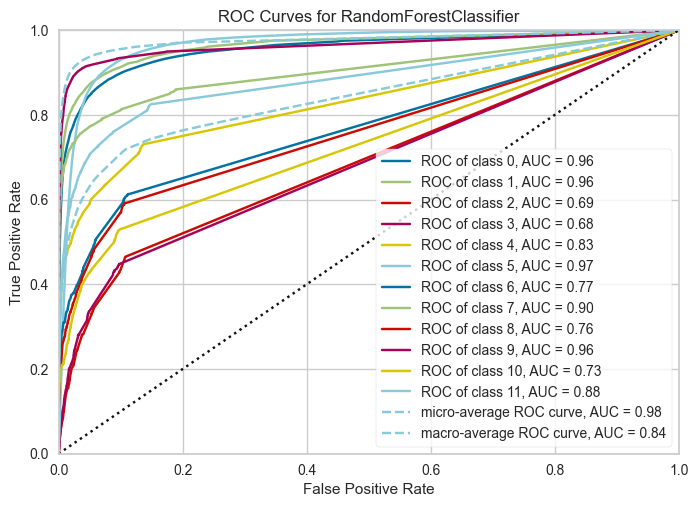

In [ ]:
# Analyze Model ->  AUC -> Area bajo la curva. A más altura de la curva, mejor será el modelo para realizar predicciones correctas.
plot_model(bestModel, plot = 'auc')

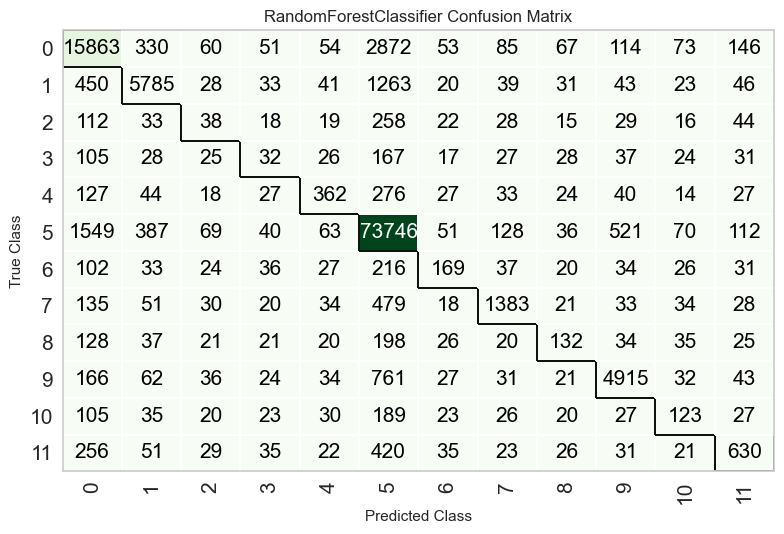

In [ ]:
# Analyze Model -> confusion matrix
plot_model(bestModel, plot = 'confusion_matrix')

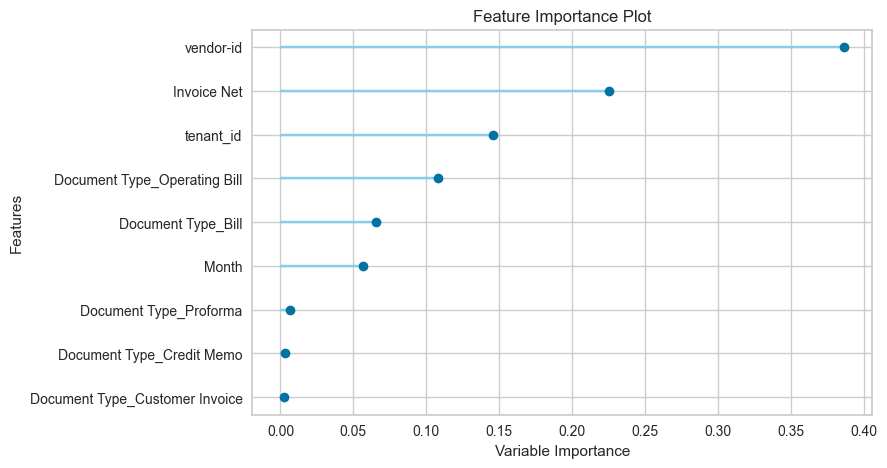

In [ ]:
# Analyze Model -> feature importance
plot_model(bestModel, plot = 'feature')

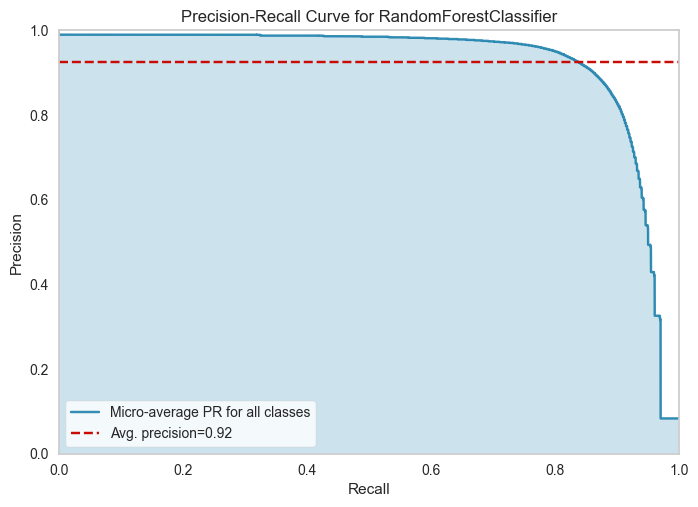

In [ ]:
# Analyze Model -> Precision Recall Curve
plot_model(bestModel, plot = 'pr')

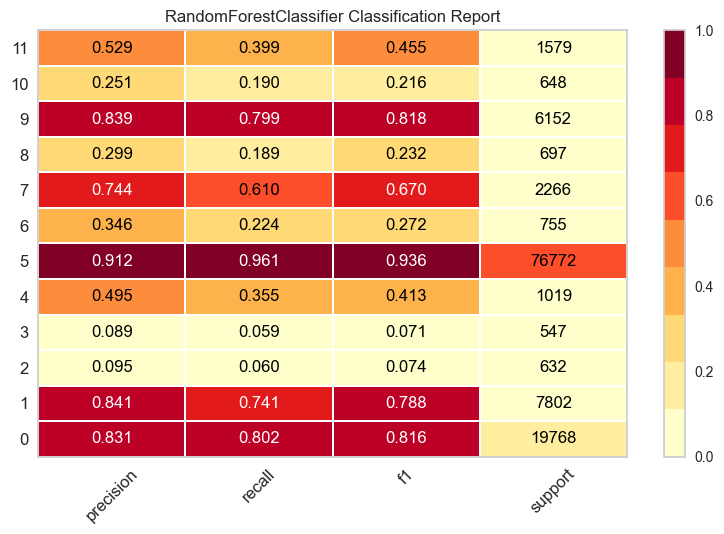

In [ ]:
# Analyze Model -> Classification Report
plot_model(bestModel, plot = 'class_report')

In [ ]:
# Analyze Model -> Model Hyperparameter
plot_model(bestModel, plot = 'parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


>- **Prediction**
>- La función predict_model retorna las columnas prediction_label y prediction_score (probabilidad de la clase predicha).

In [ ]:
# Predicciones con la data de prueba
predictions = predict_model(bestModel)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8697,0.9550,0.8697,0.8593,0.8632,0.7519,0.7535


In [ ]:
# Visualizamos las predicciones con las nuevas columnas prediction_label, prediction_score
predictions

,Month,tenant_id,vendor-id,Invoice Net,Document Type,CashFlow,prediction_label,prediction_score
136669,6,52,313,8700.719727,Bill,Net 60 Days,Net 30 Days,0.7900
348858,11,42,23,456.440002,Bill,Net 30 Days,Net 30 Days,1.0000
179545,7,35,4932,750.000000,Bill,Net 0 Days,Net 0 Days,0.7100
123941,5,12,224,5893.529785,Bill,Net 30 Days,Net 30 Days,1.0000
89067,4,59,46,5019.020020,Bill,Net 30 Days,Net 30 Days,1.0000
...,...,...,...,...,...,...,...,...
286124,9,4,178,720.000000,Proforma,Net 45 Days,Net 5 Days,0.6333
109850,5,12,3065,145.300003,Bill,Net 30 Days,Net 30 Days,1.0000
382378,12,83,197,3523.679932,Bill,Net 30 Days,Net 30 Days,0.9900
158580,6,35,4897,831.500000,Operating Bill,Net 0 Days,Net 0 Days,1.0000


In [ ]:
# Se elimina la columna 'CashFlow' del dataframe Predicciones
predictions.drop('CashFlow', axis=1, inplace=True)
predictions

,Month,tenant_id,vendor-id,Invoice Net,Document Type,prediction_label,prediction_score
136669,6,52,313,8700.719727,Bill,Net 30 Days,0.7900
348858,11,42,23,456.440002,Bill,Net 30 Days,1.0000
179545,7,35,4932,750.000000,Bill,Net 0 Days,0.7100
123941,5,12,224,5893.529785,Bill,Net 30 Days,1.0000
89067,4,59,46,5019.020020,Bill,Net 30 Days,1.0000
...,...,...,...,...,...,...,...
286124,9,4,178,720.000000,Proforma,Net 5 Days,0.6333
109850,5,12,3065,145.300003,Bill,Net 30 Days,1.0000
382378,12,83,197,3523.679932,Bill,Net 30 Days,0.9900
158580,6,35,4897,831.500000,Operating Bill,Net 0 Days,1.0000


>- **Guardar el Modelo**

In [ ]:
# Guardar el modelo
save_model(bestModel, 'ModelCashFlowPrediction')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Month', 'tenant_id', 'vendor-id',
                                              'Invoice Net'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=Fa...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max

>- **Gurdar las Predicciones**

In [ ]:
# Guardar dataset en un archivo CSV
predictions.to_csv("CashFlowPredictions.csv", index=False)